In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from mlflow.tracking.client import MlflowClient

In [4]:
mlflow.set_tracking_uri('file:///home/akira/akira/p-poteka-analysis/mlruns')

In [7]:
standard_eval_runs = MlflowClient().search_runs("8", filter_string="tags.mlflow.project.entryPoint = 'evaluate'")
print(f"standard evaluate runs count: {len(standard_eval_runs)}")

standard evaluate runs count: 14


In [8]:
from utils import get_results_dict, get_metrics_history_df
save_img_dir_path = "./grouped_chart/standard"

In [9]:
standard_results_dict = get_results_dict(standard_eval_runs)

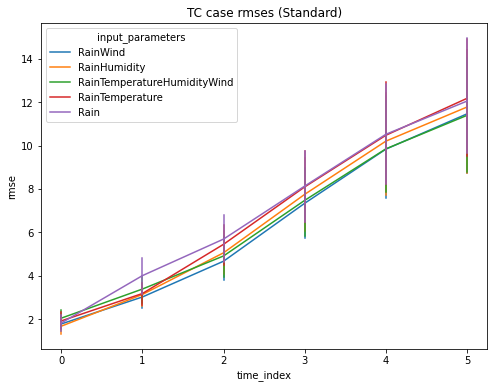

In [10]:
df = get_metrics_history_df(standard_results_dict["tc_case_rmses"])
fig, ax = plt.subplots(figsize=(8, 6))
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
sns.lineplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="time_index", y="rmse", hue="input_parameters", ax=ax, palette="tab10", err_style="bars", ci=68)
ax.set_title("TC case rmses (Standard)")
fig.savefig(f"{save_img_dir_path}/tc_case_rmses.png")

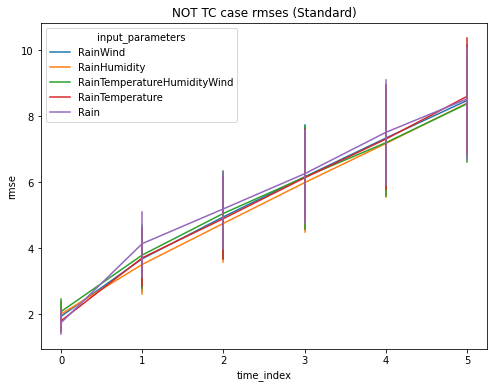

In [11]:
df = get_metrics_history_df(standard_results_dict["not_tc_case_rmses"])
fig, ax = plt.subplots(figsize=(8, 6))
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
sns.lineplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="time_index", y="rmse", hue="input_parameters", ax=ax, palette="tab10", err_style="bars", ci=68)
ax.set_title("NOT TC case rmses (Standard)")
fig.savefig(f"{save_img_dir_path}/not_tc_case_rmses.png")

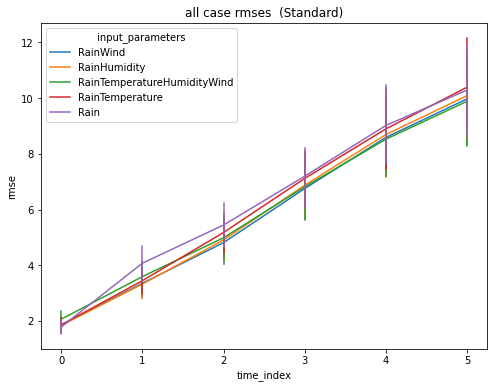

In [13]:
tc_case_df, not_tc_case_df = get_metrics_history_df(standard_results_dict["tc_case_rmses"]), get_metrics_history_df(standard_results_dict["not_tc_case_rmses"])
df = pd.concat([tc_case_df, not_tc_case_df], axis=0, ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 6))
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
sns.lineplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="time_index", y="rmse", hue="input_parameters", ax=ax, palette="tab10", err_style="bars", ci=68)
ax.set_title("all case rmses  (Standard)")
fig.savefig(f"{save_img_dir_path}/all_case_rmses.png")

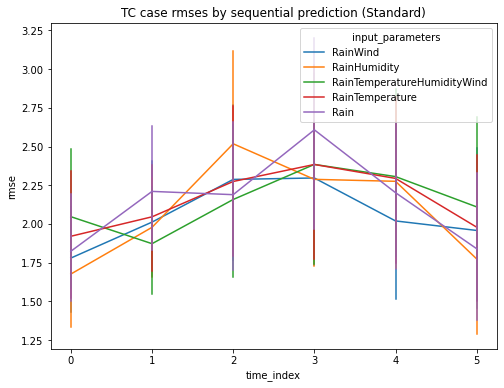

In [14]:
df = get_metrics_history_df(standard_results_dict["seq_tc_case_rmses"])
fig, ax = plt.subplots(figsize=(8, 6))
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
sns.lineplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="time_index", y="rmse", hue="input_parameters", ax=ax, palette="tab10", err_style="bars", ci=68)
ax.set_title("TC case rmses by sequential prediction (Standard)")
fig.savefig(f"{save_img_dir_path}/seq_tc_case_rmses.png")

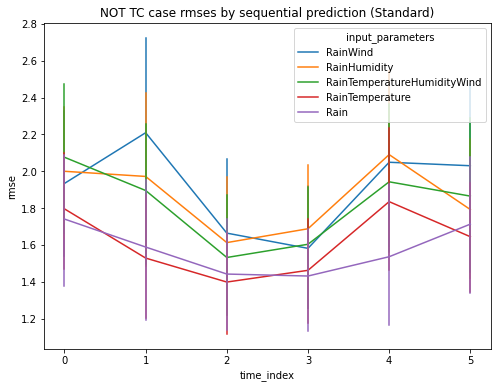

In [15]:
df = get_metrics_history_df(standard_results_dict["seq_not_tc_case_rmses"])
fig, ax = plt.subplots(figsize=(8, 6))
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
sns.lineplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="time_index", y="rmse", hue="input_parameters", ax=ax, palette="tab10", err_style="bars", ci=68)
ax.set_title("NOT TC case rmses by sequential prediction (Standard)")
fig.savefig(f"{save_img_dir_path}/seq_not_tc_case_rmses.png")

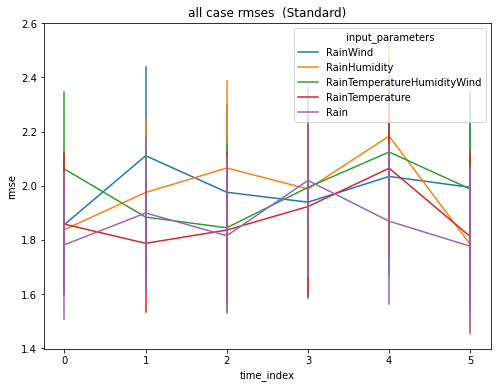

In [16]:
tc_case_df, not_tc_case_df = get_metrics_history_df(standard_results_dict["seq_tc_case_rmses"]), get_metrics_history_df(standard_results_dict["seq_not_tc_case_rmses"])
df = pd.concat([tc_case_df, not_tc_case_df], axis=0, ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 6))
target_columns = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
sns.lineplot(data=df.loc[df["input_parameters"].isin(target_columns)], x="time_index", y="rmse", hue="input_parameters", ax=ax, palette="tab10", err_style="bars", ci=68)
ax.set_title("all case rmses  (Standard)")
fig.savefig(f"{save_img_dir_path}/seq_all_case_rmses.png")